In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1.	Load the dataset (5 points)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/NLP R8 Project /blog-authorship-corpus.zip', 'r') as z:
  z.extractall()

In [0]:
text = pd.read_csv('/content/blogtext.csv', nrows = 5000)

In [0]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
id        5000 non-null int64
gender    5000 non-null object
age       5000 non-null int64
topic     5000 non-null object
sign      5000 non-null object
date      5000 non-null object
text      5000 non-null object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [0]:
text.shape

(5000, 7)

In [0]:
text.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


2.	Preprocess rows of the “text” column (7.5 points)
a.	Remove unwanted characters
b.	Convert text to lowercase
c.	Remove unwanted spaces
d.	Remove stopwords


In [0]:
#  Convert text to lowercase
text = text.apply(lambda text: text.astype(str).str.lower())

In [0]:
# Remove unwanted characters
text = text.applymap(lambda x:re.sub("[^0-9a-zA-Z#_]+"," ", x ))

In [0]:
#  Remove unwanted spaces
text =  text.applymap(lambda clean_data:clean_data.strip())

In [0]:
text.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,student,leo,14 may 2004,info has been found 100 pages and 4 5 mb of pd...
1,2059027,male,15,student,leo,13 may 2004,these are the team members drewes van der laag...
2,2059027,male,15,student,leo,12 may 2004,in het kader van kernfusie op aarde maak je ei...
3,2059027,male,15,student,leo,12 may 2004,testing testing
4,3581210,male,33,investmentbanking,aquarius,11 june 2004,thanks to yahoo s toolbar i can now capture th...


In [0]:
#Using my Own stopwords list
stopwords1 = ["a's" , "able" , "about" , "above" , "according" , "accordingly" , "across" , "actually" , "after" , "afterwards" , "again" , "against" , "ain't" , "all" , "allow" , "allows" , "almost" , "alone" , "along" , "already" , "also" , "although" , "always" , "am" , "among" , "amongst" , "an" , "and" , "another" , "any" , "anybody" , "anyhow" , "anyone" , "anything" , "anyway" , "anyways" , "anywhere" , "apart" , "appear" , "appreciate" , "appropriate" , "are" , "aren't" , "around" , "as" , "aside" , "ask" , "asking" , "associated" , "at" , "available" , "away" , "awfully" , "be" , "became" , "because" , "become" , "becomes" , "becoming" , "been" , "before" , "beforehand" , "behind" , "being" , "believe" , "below" , "beside" , "besides" , "best" , "better" , "between" , "beyond" , "both" , "brief" , "but" , "by" , "c'mon" , "c's" , "came" , "can" , "can't" , "cannot" , "cant" , "cause" , "causes" , "certain" , "certainly" , "changes" , "clearly" , "co" , "com" , "come" , "comes" , "concerning" , "consequently" , "consider" , "considering" , "contain" , "containing" , "contains" , "corresponding" , "could" , "couldn't" , "course" , "currently" , "definitely" , "described" , "despite" , "did" , "didn't" , "different" , "do" , "does" , "doesn't" , "doing" , "don't" , "done" , "down" , "downwards" , "during" , "each" , "edu" , "eg" , "eight" , "either" , "else" , "elsewhere" , "enough" , "entirely" , "especially" , "et" , "etc" , "even" , "ever" , "every" , "everybody" , "everyone" , "everything" , "everywhere" , "ex" , "exactly" , "example" , "except" , "far" , "few" , "fifth" , "first" , "five" , "followed" , "following" , "follows" , "for" , "former" , "formerly" , "forth" , "four" , "from" , "further" , "furthermore" , "get" , "gets" , "getting" , "given" , "gives" , "go" , "goes" , "going" , "gone" , "got" , "gotten" , "greetings" , "had" , "hadn't" , "happens" , "hardly" , "has" , "hasn't" , "have" , "haven't" , "having" , "he" , "he's" , "hello" , "help" , "hence" , "her" , "here" , "here's" , "hereafter" , "hereby" , "herein" , "hereupon" , "hers" , "herself" , "hi" , "him" , "himself" , "his" , "hither" , "hopefully" , "how" , "howbeit" , "however" , "i'd" , "i'll" , "i'm" , "i've" , "ie" , "if" , "ignored" , "immediate" , "in" , "inasmuch" , "inc" , "indeed" , "indicate" , "indicated" , "indicates" , "inner" , "insofar" , "instead" , "into" , "inward" , "is" , "isn't" , "it" , "it'd" , "it'll" , "it's" , "its" , "itself" , "just" , "keep" , "keeps" , "kept" , "know" , "known" , "knows" , "last" , "lately" , "later" , "latter" , "latterly" , "least" , "less" , "lest" , "let" , "let's" , "like" , "liked" , "likely" , "little" , "look" , "looking" , "looks" , "ltd" , "mainly" , "many" , "may" , "maybe" , "me" , "mean" , "meanwhile" , "merely" , "might" , "more" , "moreover" , "most" , "mostly" , "much" , "must" , "my" , "myself" , "name" , "namely" , "nd" , "near" , "nearly" , "necessary" , "need" , "needs" , "neither" , "never" , "nevertheless" , "new" , "next" , "nine" , "no" , "nobody" , "non" , "none" , "noone" , "nor" , "normally" , "not" , "nothing" , "novel" , "now" , "nowhere" , "obviously" , "of" , "off" , "often" , "oh" , "ok" , "okay" , "old" , "on" , "once" , "one" , "ones" , "only" , "onto" , "or" , "other" , "others" , "otherwise" , "ought" , "our" , "ours" , "ourselves" , "out" , "outside" , "over" , "overall" , "own" , "particular" , "particularly" , "per" , "perhaps" , "placed" , "please" , "plus" , "possible" , "presumably" , "probably" , "provides" , "que" , "quite" , "qv" , "rather" , "rd" , "re" , "really" , "reasonably" , "regarding" , "regardless" , "regards" , "relatively" , "respectively" , "right" , "said" , "same" , "saw" , "say" , "saying" , "says" , "second" , "secondly" , "see" , "seeing" , "seem" , "seemed" , "seeming" , "seems" , "seen" , "self" , "selves" , "sensible" , "sent" , "serious" , "seriously" , "seven" , "several" , "shall" , "she" , "should" , "shouldn't" , "since" , "six" , "so" , "some" , "somebody" , "somehow" , "someone" , "something" , "sometime" , "sometimes" , "somewhat" , "somewhere" , "soon" , "sorry" , "specified" , "specify" , "specifying" , "still" , "sub" , "such" , "sup" , "sure" , "t's" , "take" , "taken" , "tell" , "tends" , "th" , "than" , "thank" , "thanks" , "thanx" , "that" , "that's" , "thats" , "the" , "their" , "theirs" , "them" , "themselves" , "then" , "thence" , "there" , "there's" , "thereafter" , "thereby" , "therefore" , "therein" , "theres" , "thereupon" , "these" , "they" , "they'd" , "they'll" , "they're" , "they've" , "think" , "third" , "this" , "thorough" , "thoroughly" , "those" , "though" , "three" , "through" , "throughout" , "thru" , "thus" , "to" , "together" , "too" , "took" , "toward" , "towards" , "tried" , "tries" , "truly" , "try" , "trying" , "twice" , "two" , "un" , "under" , "unfortunately" , "unless" , "unlikely" , "until" , "unto" , "up" , "upon" , "us" , "use" , "used" , "useful" , "uses" , "using" , "usually" , "value" , "various" , "very" , "via" , "viz" , "vs" , "want" , "wants" , "was" , "wasn't" , "way" , "we" , "we'd" , "we'll" , "we're" , "we've" , "welcome" , "well" , "went" , "were" , "weren't" , "what" , "what's" , "whatever" , "when" , "whence" , "whenever" , "where" , "where's" , "whereafter" , "whereas" , "whereby" , "wherein" , "whereupon" , "wherever" , "whether" , "which" , "while" , "whither" , "who" , "who's" , "whoever" , "whole" , "whom" , "whose" , "why" , "will" , "willing" , "wish" , "with" , "within" , "without" , "won't" , "wonder" , "would" , "wouldn't" , "yes" , "yet" , "you" , "you'd" , "you'll" , "you're" , "you've" , "your" , "yours" , "yourself" , "yourselves" , "zero"]


In [0]:
#import nltk
#nltk.download("popular")
#from nltk.corpus import stopwords
#len(stopwords.words('english'))

In [0]:
 #Remove stopwords
text['text'] = text['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords1)]))

3.	As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)

  a.	Label columns to merge: “gender”, “age”, “topic”, “sign”
  
  b.	After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

In [0]:
text['labels']= text[['gender','age', 'topic', 'sign']].values.tolist()

In [0]:
text.drop(labels = ['gender', 'age', 'topic', 'id', 'sign', 'date'], axis = 1, inplace = True)

In [0]:
text.head()

,text,labels
0,info found 100 pages 4 5 mb pdf files i wait u...,"[male, 15, student, leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, student, leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, student, leo]"
3,testing testing,"[male, 15, student, leo]"
4,yahoo s toolbar i capture urls popups means i ...,"[male, 33, investmentbanking, aquarius]"


4.	Separate features and labels, and split the data into training and testing (5 points)

In [0]:
X = text.text
y = text.labels

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
print("Shape of XTrain : ", X_train.shape)
print("Shape of YTrain : ", y_train.shape)
print("Shape of XTest : ", X_test.shape)
print("Shape of YTest : ", y_test.shape)

Shape of XTrain :  (3750,)
Shape of YTrain :  (3750,)
Shape of XTest :  (1250,)
Shape of YTest :  (1250,)


5.	Vectorize the features (5 points)
    a.	Create a Bag of Words using count vectorizer

      i.	Use ngram_range=(1, 2)

      ii.	Vectorize training and testing features

    b.	Print the term-document matrix

In [0]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')

In [0]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [0]:
X_train_dtm.shape

(3750, 216138)

In [0]:
print(X_train_dtm)

  (0, 209965)	1
  (0, 94037)	1
  (0, 210010)	1
  (1, 207378)	3
  (1, 211530)	1
  (1, 85309)	1
  (1, 180032)	1
  (1, 58456)	1
  (1, 201509)	2
  (1, 31083)	1
  (1, 123436)	1
  (1, 110661)	2
  (1, 126607)	1
  (1, 49869)	1
  (1, 206644)	1
  (1, 57715)	1
  (1, 132630)	2
  (1, 207804)	2
  (1, 116550)	1
  (1, 84999)	1
  (1, 211469)	1
  (1, 28622)	1
  (1, 107094)	1
  (1, 173800)	1
  (1, 185225)	2
  :	:
  (3748, 134501)	1
  (3748, 192635)	1
  (3748, 76200)	1
  (3748, 105585)	1
  (3748, 209858)	1
  (3748, 105583)	1
  (3748, 89473)	1
  (3748, 79228)	1
  (3748, 108958)	1
  (3748, 161099)	1
  (3748, 53792)	1
  (3748, 133476)	1
  (3748, 23171)	1
  (3748, 111767)	1
  (3748, 168492)	1
  (3748, 105112)	1
  (3748, 61640)	1
  (3748, 7557)	1
  (3748, 161712)	1
  (3748, 152761)	1
  (3748, 214019)	1
  (3748, 105586)	1
  (3749, 56796)	1
  (3749, 209235)	1
  (3749, 56827)	1


6.	Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points) 

In [0]:
z = text.labels
from collections import Counter
count =  Counter(x for xs in z for x in set(xs))


In [0]:
count.most_common()

[('male', 3294),
 ('aries', 2483),
 ('technology', 2332),
 ('35', 2307),
 ('female', 1706),
 ('indunk', 1381),
 ('sagittarius', 704),
 ('student', 569),
 ('34', 540),
 ('libra', 414),
 ('scorpio', 408),
 ('24', 353),
 ('15', 339),
 ('17', 331),
 ('aquarius', 329),
 ('25', 268),
 ('leo', 190),
 ('14', 170),
 ('23', 137),
 ('engineering', 119),
 ('education', 118),
 ('33', 101),
 ('taurus', 100),
 ('26', 96),
 ('cancer', 94),
 ('businessservices', 87),
 ('gemini', 86),
 ('27', 86),
 ('capricorn', 84),
 ('39', 79),
 ('sports recreation', 75),
 ('investmentbanking', 70),
 ('pisces', 67),
 ('16', 67),
 ('communications media', 61),
 ('36', 60),
 ('non profit', 47),
 ('virgo', 41),
 ('science', 33),
 ('arts', 31),
 ('internet', 20),
 ('37', 19),
 ('banking', 16),
 ('consulting', 16),
 ('45', 14),
 ('41', 14),
 ('automotive', 14),
 ('42', 9),
 ('46', 7),
 ('religion', 4),
 ('44', 3),
 ('law', 3),
 ('museums libraries', 2),
 ('accounting', 2)]

Transform the labels - (7.5 points)

a.	Convert your train and test labels using MultiLabelBinarizer


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer() #classes = count.elements

In [0]:
ytrain = mlb.fit_transform(y_train)
ytest = mlb.transform(y_test)

In [0]:
ytrain.shape

(3750, 54)

In [0]:
ytest.shape

(1250, 54)

Choose a classifier - (5 points)

In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

a.	Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label

b.	As One-vs-Rest approach might not have been discussed in the sessions, we are providing you the code for that


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
clf = LogisticRegression(solver = 'lbfgs')
clf = OneVsRestClassifier(clf)

In [0]:
clf.fit(X_train_dtm, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
y_pred_class = clf.predict(X_test_dtm)

In [0]:
print(metrics.accuracy_score(ytest, y_pred_class))

0.5424


In [0]:
# will attempt to see if parameter tuning for count vectorizer is improving the accuracy score
def model(vect):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    print('Features: ', X_train_dtm.shape[1])
    ytrain = mlb.fit_transform(y_train)
    ytest = mlb.transform(y_test)
    clf = LogisticRegression()
    clf = OneVsRestClassifier(clf)
    clf.fit(X_train_dtm, ytrain)
    y_pred_class = clf.predict(X_test_dtm)
    print("Accuracy : ", metrics.accuracy_score(ytest, y_pred_class))

In [0]:
vect = CountVectorizer(max_features=10000, min_df=3 )
model(vect)

Features:  9671
Accuracy :  0.5384


In [0]:
vect = CountVectorizer(max_features=10000, ngram_range=(1, 3), min_df= 2 )
model(vect)

Features:  10000
Accuracy :  0.5456


In [0]:
vect = TfidfVectorizer(stop_words='english', max_features=20000, ngram_range=(1, 3))
model(vect)

Features:  20000
Accuracy :  0.4304


In [0]:
import nltk

In [0]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]


In [0]:
tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents = 'unicode',  
                                stop_words = 'english', 
                                #lowercase = True, 
                                #max_df = 0.5, # works
                                min_df = 3,
                                ngram_range=(1, 2),
                                max_features=20000 
                                ) # works

In [0]:
model(tf_vectorizer)

Features:  13870
Accuracy :  0.5352


Fit the classifier, make predictions and get the accuracy (5 points)
a.	Print the following
  
  i.	Accuracy score

  ii.	F1 score

  iii.	Average precision score

  iv.	Average recall scorev.	
  
Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? 
Read about micro/macro/weighted averaging


In [0]:
clf.fit(X_train_dtm, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
print("Accuracy score : ", metrics.accuracy_score(ytest, y_pred_class))

Accuracy score :  0.5424


In [0]:
#from sklearn.metrics import multilabel_confusion_matrix

In [0]:
class1 = mlb.classes_
#print(class1)

['14' '15' '16' '17' '23' '24' '25' '26' '27' '33' '34' '35' '36' '37'
 '39' '41' '42' '44' '45' '46' 'accounting' 'aquarius' 'aries' 'arts'
 'automotive' 'banking' 'businessservices' 'cancer' 'capricorn'
 'communications media' 'consulting' 'education' 'engineering' 'female'
 'gemini' 'indunk' 'internet' 'investmentbanking' 'law' 'leo' 'libra'
 'male' 'museums libraries' 'non profit' 'pisces' 'religion' 'sagittarius'
 'science' 'scorpio' 'sports recreation' 'student' 'taurus' 'technology'
 'virgo']


In [0]:
from sklearn.metrics import f1_score
print("Weighted F1 Score of the model: " ,f1_score(ytest, y_pred_class, average='weighted'))

Weighted F1 Score of the model:  0.6870851267192734


In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class1)):
    precision[i], recall[i], _ = precision_recall_curve(ytest[:, i],
                                                        y_pred_class[:, i])
    average_precision[i] = average_precision_score(ytest[:, i], y_pred_class[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(ytest.ravel(),
    y_pred_class.ravel())
average_precision["micro"] = average_precision_score(ytest, y_pred_class,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.57


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.57')

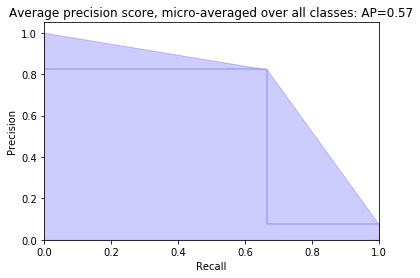

In [0]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [0]:
from sklearn.metrics import recall_score

In [0]:
print("Micro Avreaged REcall Score", recall_score(ytest, y_pred_class, average='micro'))

Micro Avreaged REcall Score 0.665


In [0]:
print("weigthed Avreaged REcall Score", recall_score(ytest, y_pred_class, average='weighted'))

weigthed Avreaged REcall Score 0.665


Print true label and predicted label for any five examples (7.5 points)

In [0]:
X_train_dtm.shape

(3750, 216138)

In [0]:
sample = X_train_dtm[:5]
sample.shape

(5, 216138)

In [0]:
actual = ytest[:5]
actual.shape

(5, 54)

In [0]:
predict = clf.predict(sample)

In [0]:
actual = pd.DataFrame(data = actual, columns = class1)
predict = pd.DataFrame(data = predict, columns = class1)

In [0]:
print("Actual labels : \n\n\n")
actual

Actual labels : 





,14,15,16,17,23,24,25,26,27,33,34,35,36,37,39,41,42,44,45,46,accounting,aquarius,aries,arts,automotive,banking,businessservices,cancer,capricorn,communications media,consulting,education,engineering,female,gemini,indunk,internet,investmentbanking,law,leo,libra,male,museums libraries,non profit,pisces,religion,sagittarius,science,scorpio,sports recreation,student,taurus,technology,virgo
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
print("Predicted labels : \n\n\n")
predict

Predicted labels : 





,14,15,16,17,23,24,25,26,27,33,34,35,36,37,39,41,42,44,45,46,accounting,aquarius,aries,arts,automotive,banking,businessservices,cancer,capricorn,communications media,consulting,education,engineering,female,gemini,indunk,internet,investmentbanking,law,leo,libra,male,museums libraries,non profit,pisces,religion,sagittarius,science,scorpio,sports recreation,student,taurus,technology,virgo
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
difference = np.where(actual != predict)

In [0]:
difference

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [0]:
df_all = pd.concat([actual, predict], 
                   axis='columns', keys=['Actuals', 'Predicted'])

In [0]:
df_final = df_all.swaplevel(axis='columns')[actual.columns[1:]]
df_final

15                16            ... technology             virgo          
  Actuals Predicted Actuals Predicted  ...    Actuals Predicted Actuals Predicted
0       0         0       0         0  ...          1         1       0         0
1       0         0       1         0  ...          0         0       0         0
2       0         0       0         0  ...          0         0       0         0
3       0         0       0         0  ...          1         1       0         0
4       0         0       0         0  ...          1         0       0         0

[5 rows x 106 columns]

In [0]:
def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('Actuals', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)
print("Highlited columns which are incorrectly classified: \n")
df_final.style.apply(highlight_diff, axis=None)

Highlited columns which are incorrectly classified: 

